In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [31]:
import matplotlib.colors
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

**Task 1**

In [32]:
a=3
b=4
size = 500
np.random.seed(42)

In [33]:
noise = np.random.normal(0, 1, size)
x_train = np.random.uniform(0, 1, size)
y_train = a + b* x_train +  noise

Scatter plot

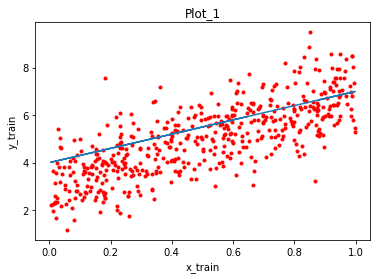

In [34]:
plt.scatter(x_train, y_train, marker = '.', color = 'r')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Plot_1')
plt.plot()
plt.plot(x_train, a * x_train + b)

**Gradient Descent**

In [35]:

a_current = random.randint(0,50)
b_current = random.randint(0,50)
learning_rate = 0.01 # скорость обучения

In [36]:
def grad(iterations):
    a_current = np.random.randint(0, 50)
    b_current = np.random.randint(0, 50)
    for i in range(iterations):
        y_pred = a_current + b_current * x_train
        loss = y_train - y_pred # отклонение результата
        a_grad = -2 * loss.mean()
        b_grad = -2 * (x_train * loss).mean()
        a_current = a_current - learning_rate * a_grad
        b_current = b_current - learning_rate * b_grad
    return a_current, b_current

In [37]:
print("Initial parametrs ",' a = ',a,' b = ', b)
a_pred, b_pred = grad(5000)
print("Result ",' a = ',a_pred,' b = ', b_pred)
print("Diffrenece ",' delta_a = ',np.abs(a - a_pred),' delta-b = ', np.abs(b - b_pred))

Initial parametrs   a =  3  b =  4
Result   a =  3.0229902114562197  b =  3.967504214618833
Diffrenece   delta_a =  0.02299021145621971  delta-b =  0.03249578538116715


**Task 2**

In [38]:
mean_1, class1_cov = [1, 3],  [[2, 0], [0, 2]]
mean_2, class2_cov = [5, 7],  [[3, 0], [0, 3]]
class1 = np.random.multivariate_normal(mean_1, class1_cov, 500)
class2 = np.random.multivariate_normal(mean_2, class2_cov, 500)

X = np.concatenate([class1, class2])
Y = np.array([0] * 500 + [1] *  500)

X, Y = shuffle(X, Y, random_state=42)

train_size = int(1000*0.7)

x_train, test_set_x = X[:train_size,:], X[train_size:,:]
y_train, test_set_y = Y[:train_size], Y[train_size:]

print(test_set_x.shape)
print(train_set_x.shape)
print(test_set_y.shape)
print(train_set_y.shape)

(300, 2)
(700, 2)
(300,)
(700,)


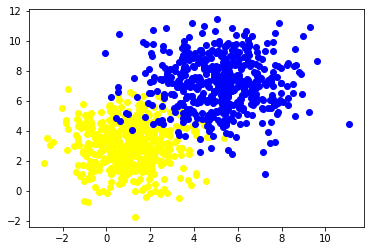

In [39]:
plt.scatter(class1[:, 0], class1[:, 1], color='yellow')
plt.scatter(class2[:, 0], class2[:, 1], color='blue')

In [40]:
iterations = 5000
learning_rate = 0.01

In [41]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

def logistic_regression(X, Y,) :
        m, n = X.shape
        W = np.zeros(n)
        b = 0
        for i in range(iterations ) :
            A = sigmoid(X.dot(W) + b)
            tmp = np.reshape( A - Y.T, m )
            dW = np.dot( X.T, tmp ) / m
            db = np.sum( tmp ) / m
            W = W - learning_rate * dW
            b = b - learning_rate * db
        return W, b

def predict(W, b, X) :
    Z = sigmoid(X.dot(W) + b)
    return np.where(Z > 0.5, 1, 0)

In [42]:
W, b =  logistic_regression(x_train, train_set_y)
y_pred_test = predict(W, b, test_set_x)
print('Accuracy: ', accuracy_score(y_pred_test, test_set_y))

Accuracy:  0.9533333333333334
